## Get the Data

In [1]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data(HOUSING_PATH)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


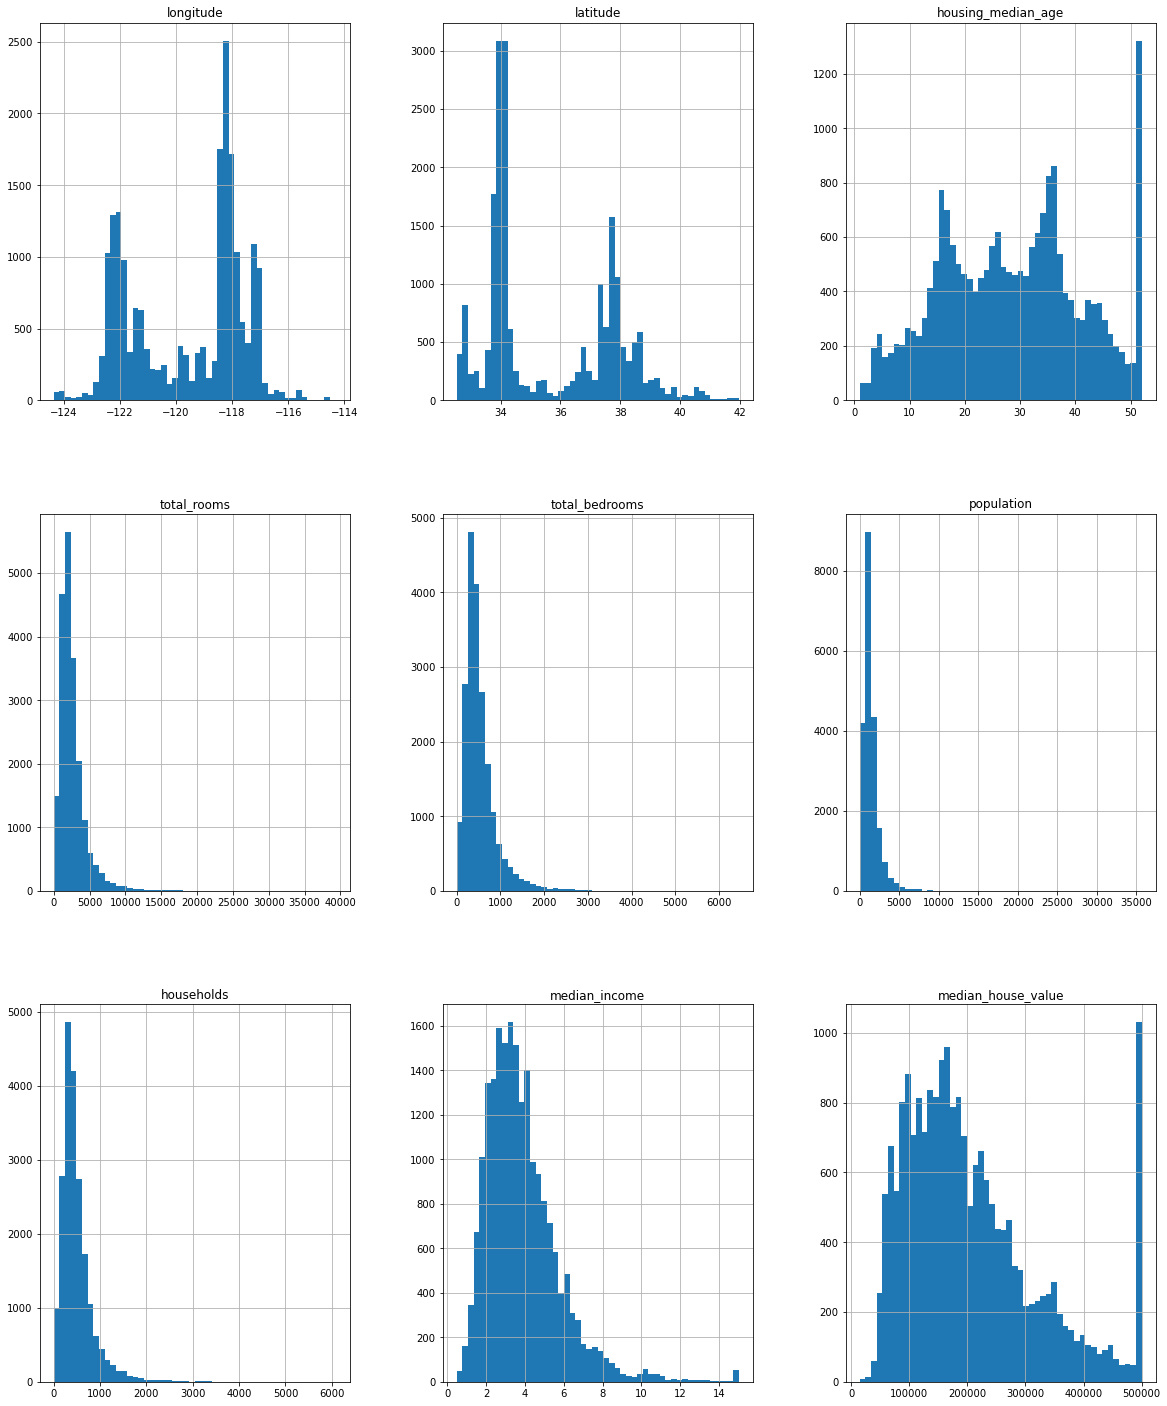

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,25))
plt.show()

In [9]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)

In [11]:
len(train_set)

16512

In [12]:
len(test_set)

4128

In [13]:
# Hash data identifier
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [14]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [15]:
housing_with_id = housing.reset_index() # adds an index column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [16]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [17]:
# Using the train_test_split function from sklearn
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [18]:
# Creating income category variable
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

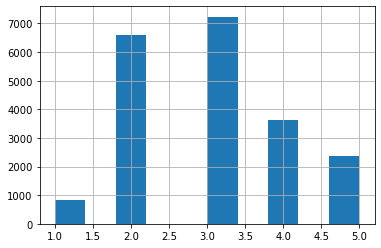

In [19]:
housing["income_cat"].hist()

In [20]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [21]:
# StratifiedShuffleSplit Provides train/test indices to split data in train/test sets.
# The folds are made by preserving the percentage of samples for each class.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [22]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [23]:
# Remove the income_cat attribute
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace= True)

## Discover and visualize te Data to Gain insights

In [24]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

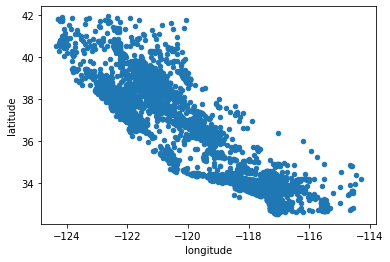

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

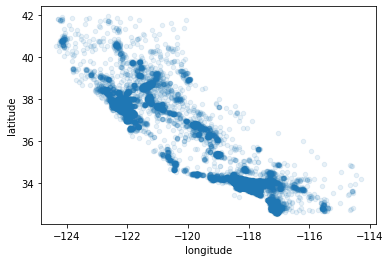

In [26]:
# To visualize the places where there is a high density of data points
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

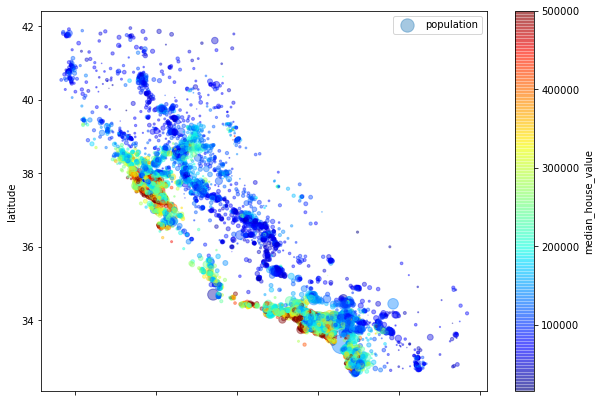

In [27]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()

## Looking for correlations

In [28]:
# Computing the standard correlation coefficient (Pearson)
corr_matrix = housing.corr()

In [29]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

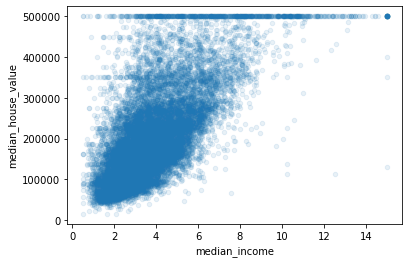

In [30]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
# we should remove horizontal lines

In [31]:
housing["rooms_per_household"] = housing["total_rooms"]/housing['households']
housing["bedrooms_per_room"] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

In [32]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Prepare the Data for Machine Learning Algorithms

In [33]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Data cleaning

In [34]:
 # To take care of missing values, we can use SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [35]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [36]:
# To compute the median of each attribute
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [37]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [38]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [39]:
# Now we can use the trained imputer to replace missing values with the learned medians
x = imputer.transform(housing_num)

In [40]:
# Transform it back to a dataframe
housing_tr = pd.DataFrame(x, columns=housing_num.columns, index=housing_num.index)

## Handling Text and Categorical Attributes

In [41]:
housing_cat = housing[["ocean_proximity"]]

In [42]:
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [43]:
# Convert categories to numbers
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [44]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [45]:
# One-hot encoding aka Dummy variables
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat1hot = cat_encoder.fit_transform(housing_cat)
housing_cat1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [46]:
housing_cat1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [47]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom transformations

In [48]:
# To build customer transformers with fit(), transform() and fit_transform() functions
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self #nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix]/X[:, households_ix]
        poplutation_per_household = X[:, population_ix]/X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household, poplutation_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, poplutation_per_household]
        


In [49]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [50]:
attr_adder.set_params()

CombinedAttributesAdder(add_bedrooms_per_room=False)

## Feature Scaling

## Transformation Pipelines

In [51]:
# Scikit-learn provides the Pipeline class to execute the transformations in the right order.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [52]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [53]:
# In version 0.20, Scikit-Learn introduced the ColumnTransformer to handle numerical and categorical columns at the same time.
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

## Select and train a model

## Training and evaluating on the training set

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [55]:
lin_reg.coef_

array([-55650.4116403 , -56716.45236929,  13732.83841856,  -1933.1277138 ,
         7330.04062103, -45708.26306673,  45455.47519691,  74714.39134154,
         6605.12802802,   1042.95709453,   9249.75886697, -18016.52432168,
       -55219.15208555, 110357.78363967, -22479.84008184, -14642.2671506 ])

In [56]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [57]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [58]:
some_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

In [59]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse 

68628.19819848922

In [60]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [61]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Better evaluation using Cross-Validation

In [62]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [63]:
tree_rmse_scores

array([69987.34319536, 67191.30393961, 71171.17060164, 69024.91162611,
       71802.56766045, 74647.01418187, 71372.87083857, 71083.25873654,
       77691.01392923, 69496.05855627])

In [64]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:",scores.mean())
    print("Standard deviation", scores.std())

In [65]:
display_scores(scores)

Scores: [-4.89822821e+09 -4.51467133e+09 -5.06533552e+09 -4.76443842e+09
 -5.15560872e+09 -5.57217673e+09 -5.09408669e+09 -5.05282967e+09
 -6.03589365e+09 -4.82970215e+09]
Mean: -5098297109.590512
Standard deviation 409189045.5954792


In [66]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [67]:
display_scores(lin_scores)

Scores: [-4.45993415e+09 -4.48365741e+09 -4.94883441e+09 -5.58600340e+09
 -4.62823518e+09 -5.06856312e+09 -4.22105290e+09 -4.66237845e+09
 -5.11981974e+09 -4.57856587e+09]
Mean: -4775704463.2029705
Standard deviation 381684974.04568213


In [68]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
forest_rmse

18640.905848334984

In [69]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)

In [70]:
forest_rmse_scores = np.sqrt(-scores)

In [71]:
display_scores(forest_rmse_scores)

Scores: [49515.75848835 47542.14659823 49829.45499687 52454.26728251
 49851.56815148 53204.64785331 48856.11690896 47791.11570335
 52614.81822377 50260.20982976]
Mean: 50192.0104036577
Standard deviation 1879.994374068905


In [72]:
# Save the models 
import joblib

joblib.dump(lin_reg, 'lin_reg.pkl')
joblib.dump(tree_reg, 'tree_reg.pkl')
joblib.dump(forest_reg, 'forest_reg.pkl')

['forest_reg.pkl']

In [73]:
my_model_loaded = joblib.load('forest_reg.pkl')

In [74]:
my_model_loaded

RandomForestRegressor()

In [75]:
my_model_loaded.score(housing_prepared, housing_labels)

0.9740420149670103

## Fine Tune your model

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

In [78]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

In [79]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [80]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [81]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [82]:
cvres = grid_search.cv_results_

In [83]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63582.53672125708 {'max_features': 2, 'n_estimators': 3}
55916.795167733886 {'max_features': 2, 'n_estimators': 10}
53089.06010982475 {'max_features': 2, 'n_estimators': 30}
59643.436997642355 {'max_features': 4, 'n_estimators': 3}
53112.60175717798 {'max_features': 4, 'n_estimators': 10}
50413.14911435084 {'max_features': 4, 'n_estimators': 30}
58827.27688649408 {'max_features': 6, 'n_estimators': 3}
52347.602894162796 {'max_features': 6, 'n_estimators': 10}
50314.238327874584 {'max_features': 6, 'n_estimators': 30}
59217.19497874728 {'max_features': 8, 'n_estimators': 3}
52314.266515330324 {'max_features': 8, 'n_estimators': 10}
50268.09267732666 {'max_features': 8, 'n_estimators': 30}
62681.58053101998 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54198.30776784165 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59810.18949802003 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52556.7534148021 {'bootstrap': False, 'max_features': 3, 'n_estimators'

## Analyze the best models and their errors

In [84]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [85]:
feature_importances

array([6.70059849e-02, 6.41381434e-02, 4.22583610e-02, 1.50834154e-02,
       1.43987670e-02, 1.48550715e-02, 1.46210653e-02, 3.71258639e-01,
       4.58020551e-02, 1.11672102e-01, 6.45778239e-02, 5.71994557e-03,
       1.62415015e-01, 8.96561687e-05, 3.32517981e-03, 2.77877451e-03])

In [86]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3712586393650839, 'median_income'),
 (0.16241501461156693, 'INLAND'),
 (0.1116721024783095, 'pop_per_hhold'),
 (0.06700598489241545, 'longitude'),
 (0.06457782387542668, 'bedrooms_per_room'),
 (0.0641381433735957, 'latitude'),
 (0.04580205512591275, 'rooms_per_hhold'),
 (0.04225836098367061, 'housing_median_age'),
 (0.015083415360915155, 'total_rooms'),
 (0.014855071547385858, 'population'),
 (0.0146210652922177, 'households'),
 (0.014398767030073043, 'total_bedrooms'),
 (0.005719945570278227, '<1H OCEAN'),
 (0.0033251798110938606, 'NEAR BAY'),
 (0.002778774513388813, 'NEAR OCEAN'),
 (8.965616866589256e-05, 'ISLAND')]

## Evaluate your system on the test set

In [87]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [88]:
final_rmse

48132.16169365254

In [89]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
       loc=squared_errors.mean(),
       scale = stats.sem(squared_errors)))

array([46094.4573381 , 50087.03406386])

## Launch, Monitorn and Maintain your System

In [93]:
# Try SVM Regressor
from sklearn.svm import SVR

svr_param_grid = [
    {'kernel': ['linear', 'rbf', 'sigmoid'], 'epsilon': [0.1, 0.5, 1]},
    {'bootstrap': [False],'kernel': ['linear', 'rbf', 'sigmoid'], 'epsilon': [0.1, 0.5, 1]}
]

svr_reg = SVR()


In [ ]:
svr_grid_search = GridSearchCV(svr_reg, svr_param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
svr_grid_search.fit(housing_prepared, housing_labels)
svr_grid_search.best_params_

In [ ]:
housing_predictions = svr_grid_search.predict(housing_prepared)
svr_rmse = np.sqrt(mean_squared_error(housing_predictions, housing_labels))
svr_rmse